# ДЗ №1 - обучение модели линейной регресии методом градиентного спуска

Реализовать обучение модели линейной регрессии методом градиентного спуска.<br />

В качестве подводящего упражнения в этом задании предлагается реализовать функции потерь и саму модель линейной регрессии в манере, схожей с построением модулей фреймворка pytorch (см. пояснения в шаблонах кода)

В решении ожидается наличие следующих ключевых составляющих:<br />

#### Текстовое описание в решении:
- формулировка задачи, формулировка признакового описания объектов, формулировка функции ошибки, формулировка меры качества модели; + 
- исследование исходных данных на предмет скоррелированности признаков; фильтрация признаков; порождение признаков (при необходимости); + 
- оценка параметров модели линейной регрессии (обучение модели) методом градиентного спуска; +
- оценка качества модели на валидационной выборке.+

#### Код решения:
(используйте предлагаемые шаблоны)
- формулировка модели линейной регрессии; + 
- формулировка функции ошибки; + 
- формулировка метрики (метрик); +
- формулировка цикла оптимизации параметров.+ 


#### Визуализация в решении:
- распределение признаков; +
- распределение целевой переменной; + 
- эволюция функции ошибки и выбранных метрик качества по ходу обучения. +

#### Выводы (в форме текста!)
- вывод о том, насколько модель подходит для описания данных +
- вывод о достаточности или избыточности данных для оценки параметров модели +
- вывод о соотношении выразительности модели и ее обобщающей способности (наблюдаются ли явления переобучения или недообучения).+

Примечания:<br />
Допустимо порождение признаков (полиномиальных, экспоненциальных, логарифмических, etc.)<br />
Реализация линейной регрессии может быть написана только с использованием библиотеки Numpy. Решения с использованием библиотек автоматического вычисления градиентов не засчитываются.<br />
Из готовых реализаций (напр., из пакета scikit-learn) в этом задании допускается использовать только порождение полиномиальных признаков `PolynomialFeatures`.

## Примечание на предмет реализации градиента функции потерь

Нелишним будет вспомнить способ вычисления градиента сложной функции. Здесь функция ошибки (обозначено как $\mathscr{L}$) представлена как сложная функция $\mathscr{L}\left( G\left( \theta \right) \right)$. Для простоты приведена сразу матричная запись.

$$
\nabla_{\theta}{\mathscr{L}} = \nabla_{\theta}{G}\cdot\left(\nabla_{G}{\mathscr{L}}\right)
$$

В качестве шпаргалки можно подсмотреть правила матричного дифференцирования <a href="https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf">здесь</a>

Например, в случае функции потерь MSE это может выглядеть следующим образом:

$$
\nabla_{\theta}{\mathscr{L}} = X^T\cdot2\left(X\theta - Y\right)
$$


При этом логически имеет смысл реализовать компоненту градиента, относящуюся собственно к функции потерь $\nabla_{G}{\mathscr{L}}$ - в коде класса функции потерь, а компоненту, относящуюся к модели $\nabla_{\theta}{G}$ - в коде модели.

Именно поэтому классы `loss` и `linear_regression` в предложенном шаблоне реализованы наследующими `Differentiable` - для общности восприятия этих модулей как дифференцируемых по своим аргументам.

<center><h1>Решение задачи</h1><center>

## Описание задачи

В данной задаче требуется реализовать алгоритм линейной регрессии для обучения с учителем, с оптимизацией функции ошибки методом градиентного спуска. По условию предоставлена некоторая выборка объектов, происхождение которых мне неизвестно. Соответственно под $X$ будем понимать матрицу с признаковым описанием объектов, а под $y$ - вектор-столбец, состоящих из того, что нам надо предсказать на этих объектах. Так как задача регрессии, то соответственно $y$ - это вектор действительных чисел.

Алгоритм линейной регресси в матричном виде представляется тогда как:
$$
a(X) = Xw,
$$
где $w$ - вектор-столбец весов, a $a(X)$ - ответ алгоритма (вектор-столбец) на матрице объектов $X$.

Если перемножить, то в развернутом виде получается вот такая набор выражений:
$$
\begin{equation}
    \begin{cases}
    \sum\limits_{i=1}^n x_i^{1} w_i = y_{pred}^{1}
    \\
    \sum\limits_{i=1}^n x_i^{2} w_i = y_{pred}^{2}
    \\
    ...
    \\
    \sum\limits_{i=1}^n x_i^{m} w_i = y_{pred}^{m}
    \end{cases}
\end{equation}
$$

Теперь, когда мы знаем, как нам предсказывать ответ на объектах, нам надо понять, а хорошо ли мы вообще это делаем. Для этого вводится функция ошибки $L^i(y^i, y^i_{pred})$, которая принимает истинный ответ и нами предсказанный на i-ом объекте, и возвращает некоторое число. В задаче регрессии, как правило, чем это число меньше, тем лучше. Так как обычно объектов больше, чем один и лучший по близости ответ мы хотим получать сразу на всех объектах, то введем функционал ошибки $L(y, y_{pred}) = \sum\limits^m_{i=1} L^i(y^i, y^i_{pred})$
Предполагая, что ответы на алгоритме имеют распределение $N(0, 1)$, а также, что объекты выборки независимо одинаково распределенные тогда метод максимального правдоподобия говорит, что за функционал ошибки стоить взять $MSE$ (mean squared error), который выглядит, как
$$
\frac{1}{m} \sum\limits_{i=1}^{m} (y^i - y^i_{pred})^2
$$
Таким образом,  задача свелась к минимизации выпуклой функции. Очевидно, что искать нам надо минимум по вектору весов $w$, а сам процесс оптимизации мы будем делать методом градиентного спуска, как было заявлено выше.

После того, как мы разделим данные на `train/test`, на train-данных мы будем минимизировать $MSE$, а затем проверять итоговое качество на тестовых данных, оценивая также $MSE$, но уже как `метрику`.

## Описание метода градиентного спуска

Так как направление вектора градиента совпадает с направлением наискорейшего возрастания функции, то тогда можно итеративно уменьшать вектор весов следующим образом:
$$
w^{n+1} = w^{n} - \alpha\nabla_{w}{L} 
,$$
где $\alpha$ - learning rate, в простом случае какая-то константа, которая отражает скорость движения в направлении градиента.

В нашем случае с $MSE$ градиент можно найти следующим образом: $X^T\cdot2\left(Xw - y\right)$

In [1]:
import numpy as np
import pandas as pd
from abc import ABC, abstractmethod
from tqdm import tqdm

%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('ggplot')

from warnings import filterwarnings
filterwarnings('ignore')

## Предварительный анализ данных

In [2]:
X = np.load('./X_train.npy')
y = np.load('./y_train.npy')

Для начала, создадим таблицу из фичей и целевых значений и немножко посмотрим, какого рода данные достались

In [3]:
from itertools import chain

columns = chain((f"feature_{i}" for i in range(1, X.shape[1] + 1)), ('target',))

data = pd.DataFrame(
    np.concatenate((X, y), axis=1),
    columns=columns
)
data.head()

,feature_1,feature_2,feature_3,feature_4,target
0,-1.379859,-1.639242,1.904012,-2.627268,2.468626
1,-5.411598,-5.495438,29.285391,-158.480757,9.998146
2,-4.299786,-4.594803,18.488158,-79.495119,9.279000
3,-6.005137,-5.921348,36.061665,-216.555224,8.634806
4,-6.420339,-6.364172,41.220748,-264.651158,9.567111


In [4]:
data.shape

(10000, 5)

In [5]:
data.describe()

,feature_1,feature_2,feature_3,feature_4,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.023107,0.022998,28.835876,1.692730,14.527903
std,5.370123,5.375967,20.666320,266.036383,18.980914
min,-12.479018,-12.515073,0.000007,-1943.306171,-57.872737
25%,-4.966595,-4.963999,13.170098,-122.511325,5.350223
50%,-0.029218,-0.036860,24.895115,-0.000025,8.754593
75%,5.033995,5.024538,40.093336,127.567014,15.689532
max,11.898036,11.955627,155.725889,1684.324907,193.520096


Можно заметить, что `feature_1` и `feature_2` довольно сильно похожи по своим описательным статистикам. В дальнейшем, посмотрим на это еще с точки зрения корреляции.

In [6]:
data.dtypes

feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
target       float64
dtype: object

In [7]:
 data.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
target       0
dtype: int64

Как видно, все признаки числовые, в данных пропусков нет.

Построим теперь матрицу корреляций Пирсона

In [8]:
def calc_corr(feature_1, feature_2):
    # подсчет среднего
    mean_1 = np.mean(feature_1)
    mean_2 = np.mean(feature_2)
        
    # подсчет дисперсии 
    var_1 = np.mean((feature_1 - mean_1)**2)
    var_2 = np.mean((feature_2 - mean_2)**2)
    
    # подсчет ковариации
    cov_1_2 = np.mean((feature_1 - mean_1) * (feature_2 - mean_2))
    
    return cov_1_2 / np.sqrt(var_1 * var_2)
    
    
def get_correlation_table(dataset):
    corr_matrix = pd.DataFrame(index=dataset.columns, columns=dataset.columns, dtype=np.float64)
    np.fill_diagonal(corr_matrix.values, 1.0)
    
    for column_1 in dataset.columns:
        for column_2 in dataset.columns:
            corr_matrix.loc[column_2, column_1] = calc_corr(dataset[column_1], dataset[column_2])
            corr_matrix.loc[column_1, column_2] = calc_corr(dataset[column_1], dataset[column_2])
    
    return corr_matrix

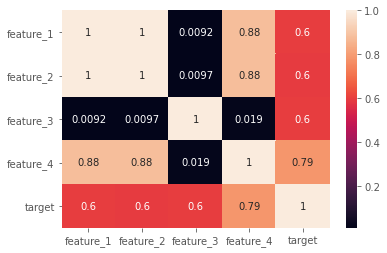

In [9]:
corr_table =  get_correlation_table(data)
sns.heatmap(
    corr_table,
    annot=True,
);

Как видно из матрицы корреляций, `feature_1` и `feature_2` буквально идентичные. Скорее всего, данные были просто ошибочно продублированы. Следует удалить одну из этих фичей, так как в противном случае мультиколлинеарность - прямая дорога к переобучению.

In [10]:
data = data.drop(labels='feature_1', axis=1)
data.head()

,feature_2,feature_3,feature_4,target
0,-1.639242,1.904012,-2.627268,2.468626
1,-5.495438,29.285391,-158.480757,9.998146
2,-4.594803,18.488158,-79.495119,9.279000
3,-5.921348,36.061665,-216.555224,8.634806
4,-6.364172,41.220748,-264.651158,9.567111


Посмотрим далее графически на совместные зависимости данных, а также на распределения

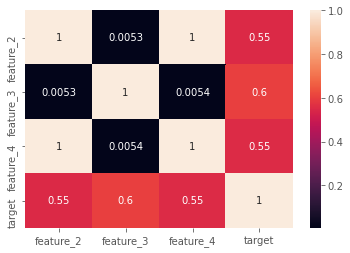

In [11]:
sns.heatmap(data.corr(method='spearman'), annot=True);

По корреляции Спирмена, `feature_2` и `feature_4` также сильно скоррелированы сильно, поэтому также удалим `feature_4`

In [12]:
data = data.drop('feature_4', axis=1)

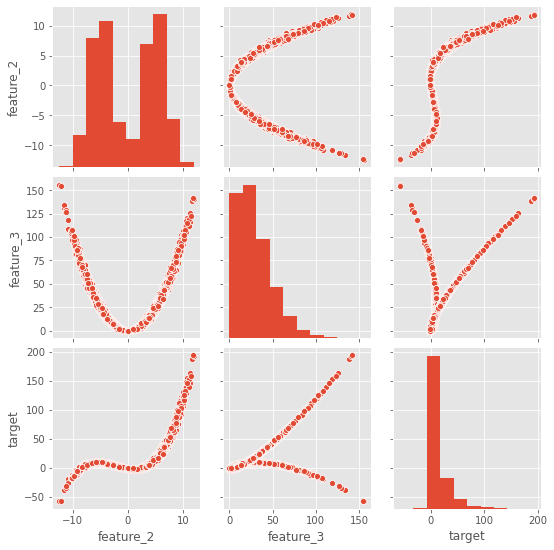

In [13]:
sns.pairplot(
    data,
);

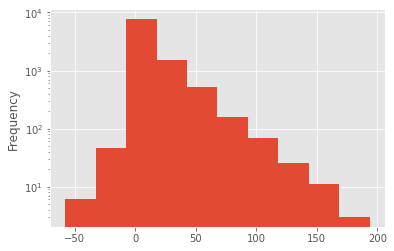

In [14]:
data['target'].plot(kind='hist', log=True);

Видно, что `feature_2` и `feature_3` связаны квадратично, поэтому генерить квадраты не стоит, так как это приведет опять же к мультиколлинеарности. Можно попробовать сгененерировать куб `feature_2`.

## Подготовка данных к обучению и тесту

Далее разобьем данные на `train/test` (80% оставим на обучение, 20% - на тест). Также отнормируем их, причем фитить scaler будем только на train'e, чтобы не произошло утечки в test

In [15]:
# аналог train_test_split
def make_train_test(X, y, train_size=0.8):
    perm = np.random.permutation(range(len(X)))
    train_indx = perm[:int(train_size * len(X))]
    test_indx = perm[int(train_size * len(X)):]
    
    return (
        X[train_indx], X[test_indx],
        y[train_indx], y[test_indx],
    )


# приводим данные к стандартной форме (среднее == 0 && дисперсия == 1)
def scale_data(X_train, X_test, y_train, y_test):
    X_mean = np.mean(X_train, axis=0)
    y_mean = np.mean(y_train, axis=0)
    X_std = np.std(X_train, axis=0)
    y_std = np.std(y_train, axis=0)
    
    X_train = (X_train - X_mean) / X_std
    X_test = (X_test - X_mean) / X_std
    y_train = (y_train - y_mean) / y_std
    y_test = (y_test - y_mean) / y_std
    
    return (
        X_train, X_test,
        y_train, y_test,
    )

    
# объединение всей подготовки данных в одную функцию
def prepare_data(X, y):
    X_train, X_test, y_train, y_test = make_train_test(X, y)
    X_train, X_test, y_train, y_test = scale_data(X_train, X_test, y_train, y_test)
    
    return (
        X_train, X_test,
        y_train, y_test,
    )

## Создание модели

1) класс `Differentiable`: это абстракный базовый класс для всех последующих моделей, связанных с регрессией

2) класс `Loss`: данный класс описывает функционал потерь. У него есть методы для подсчета части градиента, которая относится к внешней части лосса, а также метод, возвращающий само значение лосса. В даанном конкретном случае - это **MSE**

3) класс `LinearRegression`: класс описывает модель линейной регрессии. Есть метод для подсчета части градиента, относящейся к внутренней части функционала лосса, а также метод для подсчета самого значения линейной регрессии (Xw)

4) функция `train_loop`: принимает исходные данные, модель, функционал лосса, количество эпох и learning_rate. Итеративно (количество повторений == количеству эпох). На каждой итерации мы делаем шаг градиентного спуска и считаем лосс. Функция возвращает list из значений функции ошибки на каждом шаге.

In [16]:
class Differentiable(ABC):
    def __init__(self):
        pass
    
    @abstractmethod
    def forward(self, **kwargs):
        pass
    
    @abstractmethod
    def backward(self, **kwargs):
        pass

In [17]:
class Loss(Differentiable):
    def __init__(self):
        super(Loss, self).__init__()
    
    def forward(self, y_pred, y_true):
        # Этот метод реализует вычисление значения функции потерь
        # Подсказка: метод должен возвращать единственный скаляр - значение функции потерь
        assert y_pred.shape == y_true.shape, f'y_true shape != y_pred shape ({y_true.shape} != {y_pred.shape})'
        n = y_pred.shape[0]
        
        loss_value = (1 / n) * np.sum((y_pred - y_true)**2)
                 
        return loss_value
    
    def backward(self, y_pred, y_true):
        # Этот метод реализует вычисление градиента функции потерь по аргументу y_pred
        # Подсказка: метод должен возвращать вектор градиента функции потерь
        #           размерностью, совпадающей с размерностью аргумента y_pred
        
        partial_grad = np.zeros_like(y_pred-y_true)
        n = y_pred.shape[0]
        
        partial_grad = (2 / n) * (y_pred - y_true) 
        
        assert y_pred.shape == partial_grad.shape, f'y_pred shape != partial_grad shape ({y_pred.shape} != {partial_grad.shape})'
        return partial_grad

In [18]:
class LinearRegression(Differentiable):
    def __init__(self, fit_intercept=False):
        super(LinearRegression, self).__init__()
        self.theta = None
        self.fit_intercept = fit_intercept
    
    def __call__(self, X):
        # этот метод предназначен для вычисления значения целевой переменной
        return self.forward(X)
    
    def backward(self, X):
        # Этот метод реализует вычисление компоненты градиента функции потерь
        
        partial_grad = X.T
        
        return partial_grad
    
    def forward(self, X):
        # этот метод предназначен для применения модели к данным
        assert X.ndim == 2, "X should be 2-dimensional: (N of objects, n of features)"
        
        if self.theta is None:
            # Если вектор параметров еще не инициализирован, его следует инициализировать
            # Подсказка: длина вектора параметров может быть получена из размера матрицы X
            self.theta = np.zeros((X.shape[1], 1))
        
        X = np.concatenate((X, np.ones(X.shape[0], 1)), axis=1) if self.fit_intercept else X
        y_pred = np.dot(X, self.theta)
        
        return y_pred

In [19]:
def train_loop(X_train, y_train, model, loss_fn, epochs=100, learning_rate=0.05):
    loss_history = []
    pbar = tqdm(total=epochs)
    for epoch in range(epochs):
        # В этом цикле следует реализовать итеративную процедуру оптимизации параметров модели model,
        #        руководствуясь функцией потерь loss_fn
        
        
        y_pred = model.forward(X_train)
        loss_value = loss_fn.forward(y_pred, y_train)  # вычисление значения лосса
        grad = np.dot(model.backward(X_train), loss_fn.backward(y_pred, y_train))  # вычисление градиента
        
        model.theta -= learning_rate * grad  # шаг градиетного спуска
        
        loss_history.append(loss_value)
        pbar.update(1)
        pbar.set_postfix({'loss': loss_value})
    pbar.close()
    return loss_history

## Процесс обучения

In [20]:
X_train, X_test, y_train, y_test = prepare_data(X, y)

In [21]:
obj_fn = Loss()
lr_model = LinearRegression()
loss_history = train_loop(X_train, y_train, lr_model, obj_fn, epochs=1000);

100%|██████████| 1000/1000 [00:01<00:00, 918.61it/s, loss=0.00137]


In [22]:
print(loss_history[-1])

0.0013678957342207812


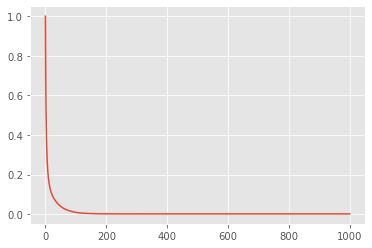

In [23]:
plt.plot(loss_history);

## Оценка работы модели

In [24]:
from sklearn.metrics import mean_squared_error

y_pred = lr_model.forward(X_test)

print(f"MSE on test_data: {obj_fn.forward(y_pred, y_test)}")

MSE on test_data: 0.0015037588977660668


## Порождение полиномиальных признаков

In [25]:
from sklearn.preprocessing import PolynomialFeatures

def make_poly_features(X, degree=2):
    poly_transformer = PolynomialFeatures(degree=degree)
    
    return poly_transformer.fit_transform(X)

feature_2_triple = data['feature_2'] ** 3
data_poly = pd.concat([data, feature_2_triple], axis=1)
X_poly = data_poly.drop('target', axis=1)
y_poly = data_poly['target']

In [26]:
X_poly.columns = ['feature_2', 'feature_3', 'feature_2_triple']

In [27]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = prepare_data(X_poly.values, y_poly.values)

## ВЫВОД
в целом, то что у меня получилось, работает довольно  неплохо, поэтому линейная регрессия должна подходить для подобной задачи

По моим результатам переобучения не наблюдается, избыточность данных очевидно есть, в процессе описания решения задачи, я пытался от нее избавиться по средствам удаления лишиних фичей, к примеру.